# N-Queen using Memetic algorithm

#### By Niloufar Babaahmadi (610398103)

In [11]:
import numpy as np
import pandas as pd
import more_itertools as mit
import matplotlib as plt
import matplotlib.pyplot as plt
import random
from math import sqrt
import random

This function will help us find the best and worst solutions in order to find the best solution for N queens to stay in a chess board without threatening each other.

In [2]:
def fitness_func(chromosome):
     
    global size
    
    danger = 0
    
    #N queen stance formula
    
    for i in range(size - 1):
        
        for j in range(i+1, size):
        
            chrom_i = chromosome[i]
            chrom_j = chromosome[j]

            s1 = abs(i - j) 
            s2 = abs(chrom_i - chrom_j)

            if s1 == s2:
                
#                 print(chromosome[i])
#                 print(chromosome[j])
#                 print("----------------")

                danger += 1
                
    #print(danger) 
    return danger

we use local search in memetic algorithm to find the best neighbouring chromosome and replacing it with the one already in use to enhance our algorithm.

In [3]:
def local_search(chromosome):
    
    #print(chromosome)
    
    global size
    
    neighbour = []
    temp = chromosome[:]
    
    #finding the neighbours through shuffling the chromosome we already have
    
    for i in range(size):
        
        random.shuffle(temp)
        
        if temp not in neighbour:
            
            neighbour.append(temp[:])
            #print(temp)

    #print(neighbour)
    #print(neighbour)
    
    best_chrom = []
    fit = 0
    best_fit = fitness_func(chromosome)
    
    #find the most eligible neighbour
    
    for i in range(len(neighbour)):
        
        fit = fitness_func(neighbour[i])
        
        if fit < best_fit:
            
            best_fit = fit
            best_chrom = neighbour[i]
        
        else:
            
            best_chrom = neighbour[i]
            
    #print(best_chrom)
            
    return best_chrom

With the help of this function we can create chromosomes as much as the population demands.

In [4]:
def society_creator(population):
    
    chromosomes = []
    fitnesses = []
    
    for i in range(population):

        chromosomes.append(mit.random_permutation(range(size)))
        
    for chromosome in chromosomes:
        
        #print(chromosome)
        #print(len(chromosome))
        fitnesses.append(fitness_func(chromosome))
        
    society = pd.DataFrame({'chromosomes':chromosomes,'fitnesses':fitnesses})
    
    #print(society)
    
    return chromosomes, society

Chooses the top best parents for the cross over.

In [5]:
def truncation(T, N):
    
    global society
    #print(society, '\n')
    
    # 0 < T < 1
    society = society.sort_values(by=['fitnesses'])
    int_T = int(T * len(society))
    
    #selecting the first rows of the dataframe
    made_df = society.head(int_T)
    made_df = made_df.sample(N)
    
    return made_df

We choose random variable i1 so that the elements before i1 will be inheritated from gene1 and the elements after i1 will be inheritated from gene2.

In [6]:
def crossover(gene1, gene2):
    
    i1 = np.random.randint(0, size)
    child = []
    
    for i in range(i1):
        
        child.append(gene1[i])
        
    for i in range(i1,size):
        
        if(gene2[i] not in child):
            
            child.append(gene2[i])
            
    x = 6 - len(child)
    
    if x!=0 :
        
        for i in range(i1):
            
            if (gene2[i] not in child):
                
                child.append(gene2[i])
                
            if len(child) == size:
                
                break
                
    return child

i1 and i2 are choosen randomly and swapped to create a mutated gene.

In [7]:
def mutation(gene):
    
    i1 = np.random.randint(0, size)
    i2 = np.random.randint(i1, size)
    
    #print(i1)
    #print(i2)
    
    temp1 = gene[i1]
    temp2 = gene[i2]
    
    gene[i1] = temp2
    gene[i2] = temp1
    
    #print(gene)
    
    return gene

In [8]:
global size
size = 100

global chromosomes
global society
chromosomes, society = society_creator(150)
#print(society)

global children

In [9]:
#The algorithm will keep repeating until we have exactly 0 queens threatening each other.


last_df = society.sort_values(by=['fitnesses'])
    

while last_df['fitnesses'].values[0] != 0:
    
    children =[]
    
    #We will choose the top society members as our breeders
    s = truncation(0.6, 50)['chromosomes'].to_list()
    
    rand1 = 0
    rand2 = 0
    
    #Now children are created
    for i in range(100):
        
        rand1 = np.random.randint(0, 50)
        rand2 = np.random.randint(0, 50)
            
        child = crossover(s[rand1], s[rand2])
        children.append(child)
        
    #mutate the children
     
    for i in range(50):
        
        children[i] = mutation(children[i])
        
    #apply local search to children for the sake of variaton and/or enhancing the result.
        
    for i in range(90, 50, -1):
        
        children[i] = local_search(children[i])
        
    fitness = []
    
    #find the fitness of children of the next generation
    for i in range(100):
        
        fitness.append(fitness_func(children[i]))

    children_dataframe  = pd.DataFrame({'chromosomes':children,'fitnesses':fitness})
    
    #Replace the worst members of the society with children 
    society = society.sort_values(by=['fitnesses'])   
    society = society.head(50)
    
    frames = [society, children_dataframe]
    society = pd.concat(frames)
    
    last_df = society.sort_values(by=['fitnesses'])
    
    print(last_df)


                                           chromosomes  fitnesses
84   [39, 72, 71, 69, 41, 36, 46, 29, 62, 98, 59, 1...         46
35   (22, 78, 3, 73, 47, 6, 54, 17, 34, 14, 50, 7, ...         48
89   (30, 63, 45, 97, 9, 24, 34, 71, 50, 6, 67, 60,...         50
112  (68, 33, 1, 10, 5, 27, 16, 58, 74, 25, 50, 67,...         50
145  (51, 54, 81, 23, 44, 53, 91, 90, 24, 18, 89, 7...         51
..                                                 ...        ...
27   [52, 23, 98, 96, 21, 94, 28, 35, 73, 55, 78, 2...         73
21   [91, 13, 92, 48, 17, 24, 35, 45, 71, 3, 23, 62...         76
20   [32, 71, 98, 58, 47, 59, 80, 44, 76, 72, 74, 6...         76
80   [45, 46, 0, 7, 12, 47, 29, 93, 65, 74, 49, 56,...         77
67   [27, 22, 81, 8, 70, 73, 74, 4, 75, 79, 60, 84,...         78

[150 rows x 2 columns]
                                           chromosomes  fitnesses
84   [39, 72, 71, 69, 41, 36, 46, 29, 62, 98, 59, 1...         46
35   (22, 78, 3, 73, 47, 6, 54, 17, 34, 14, 50, 7, .

                                          chromosomes  fitnesses
5   [14, 37, 28, 42, 96, 74, 44, 84, 32, 48, 13, 1...         40
8   [31, 19, 62, 74, 68, 33, 88, 43, 37, 47, 12, 2...         43
97  [14, 37, 28, 42, 96, 74, 44, 84, 32, 48, 13, 1...         44
41  [68, 33, 1, 10, 5, 27, 16, 58, 74, 25, 50, 67,...         44
29  [39, 72, 71, 69, 41, 36, 46, 29, 62, 98, 59, 1...         44
..                                                ...        ...
82  [90, 73, 58, 87, 53, 15, 7, 3, 20, 29, 99, 94,...         80
0   [52, 88, 98, 3, 57, 22, 64, 58, 26, 19, 84, 38...         82
87  [27, 77, 49, 79, 18, 85, 62, 83, 87, 56, 59, 2...         83
89  [61, 16, 30, 51, 50, 28, 55, 80, 29, 97, 36, 4...         87
31  [45, 13, 23, 56, 73, 16, 57, 50, 99, 60, 0, 22...         88

[150 rows x 2 columns]
                                          chromosomes  fitnesses
5   [14, 37, 28, 42, 96, 74, 44, 84, 32, 48, 13, 1...         40
8   [31, 19, 62, 74, 68, 33, 88, 43, 37, 47, 12, 2...         43
9

                                          chromosomes  fitnesses
49  [31, 19, 62, 74, 68, 33, 88, 43, 37, 47, 12, 2...         39
5   [14, 37, 28, 42, 96, 74, 44, 84, 32, 48, 13, 1...         40
30  [68, 64, 3, 19, 82, 91, 93, 83, 78, 92, 0, 56,...         40
17  [62, 28, 55, 15, 54, 78, 80, 25, 41, 66, 98, 5...         42
9   [17, 28, 55, 15, 54, 78, 80, 25, 41, 66, 98, 5...         42
..                                                ...        ...
87  [4, 58, 65, 99, 16, 20, 55, 89, 86, 97, 60, 32...         75
78  [43, 80, 14, 21, 76, 33, 86, 17, 87, 53, 39, 1...         76
77  [46, 33, 11, 53, 29, 42, 85, 44, 68, 94, 63, 5...         76
99  [68, 64, 3, 19, 82, 91, 93, 83, 78, 92, 0, 56,...         76
81  [65, 47, 37, 3, 56, 97, 49, 50, 67, 23, 22, 85...         81

[150 rows x 2 columns]
                                          chromosomes  fitnesses
49  [31, 19, 62, 74, 68, 33, 88, 43, 37, 47, 12, 2...         39
5   [14, 37, 28, 42, 96, 74, 44, 84, 32, 48, 13, 1...         40
3

                                          chromosomes  fitnesses
30  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         36
0   [14, 37, 28, 42, 96, 74, 44, 84, 32, 48, 13, 1...         37
28  [31, 19, 62, 74, 68, 33, 88, 43, 37, 47, 12, 2...         38
19  [75, 37, 50, 14, 90, 60, 62, 8, 66, 19, 9, 70,...         38
49  [31, 19, 62, 74, 68, 33, 88, 43, 37, 47, 12, 2...         39
..                                                ...        ...
76  [79, 21, 14, 24, 60, 78, 0, 83, 20, 56, 67, 84...         76
51  [56, 36, 70, 9, 46, 19, 13, 17, 57, 92, 88, 75...         78
70  [47, 0, 3, 71, 53, 8, 98, 69, 55, 27, 65, 87, ...         81
85  [4, 42, 3, 92, 84, 41, 95, 29, 87, 32, 48, 60,...         85
82  [75, 34, 9, 68, 63, 53, 1, 22, 7, 82, 45, 69, ...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
30  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         36
0   [14, 37, 28, 42, 96, 74, 44, 84, 32, 48, 13, 1...         37
2

                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         32
14  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         33
48  [71, 74, 43, 50, 66, 6, 48, 29, 35, 26, 99, 1,...         34
39  [14, 37, 28, 42, 96, 74, 44, 84, 32, 48, 13, 1...         35
92  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         35
..                                                ...        ...
71  [24, 47, 27, 19, 36, 48, 34, 9, 6, 1, 43, 72, ...         78
55  [35, 8, 0, 11, 27, 78, 40, 51, 6, 16, 42, 24, ...         81
63  [74, 11, 96, 73, 65, 22, 21, 92, 23, 52, 44, 5...         85
78  [12, 38, 98, 2, 14, 91, 55, 46, 88, 29, 83, 22...         86
70  [91, 87, 21, 22, 6, 8, 56, 53, 55, 75, 92, 86,...         87

[150 rows x 2 columns]
                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         32
14  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         33
4

                                          chromosomes  fitnesses
35  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         31
25  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         32
24  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         32
28  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         32
9   [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         32
..                                                ...        ...
90  [81, 2, 26, 1, 51, 72, 18, 33, 86, 91, 7, 5, 5...         78
78  [41, 79, 89, 26, 61, 75, 20, 76, 50, 46, 9, 16...         78
80  [27, 87, 14, 22, 47, 61, 74, 29, 0, 92, 71, 19...         80
79  [89, 25, 44, 3, 24, 12, 94, 49, 37, 51, 74, 86...         85
74  [22, 71, 47, 14, 79, 97, 82, 93, 11, 12, 85, 9...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
35  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         31
25  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         32
2

                                          chromosomes  fitnesses
41  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         29
99  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         30
17  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         30
49  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         30
29  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         31
..                                                ...        ...
74  [35, 51, 41, 4, 45, 19, 6, 23, 81, 21, 61, 93,...         77
51  [9, 7, 46, 57, 32, 58, 5, 2, 95, 12, 71, 55, 4...         77
90  [55, 33, 17, 53, 70, 74, 13, 24, 0, 14, 22, 8,...         78
76  [70, 86, 44, 80, 60, 38, 48, 20, 56, 49, 76, 2...         88
54  [67, 80, 18, 2, 36, 37, 91, 93, 65, 11, 92, 74...         89

[150 rows x 2 columns]
                                          chromosomes  fitnesses
41  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         29
99  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         30
1

                                          chromosomes  fitnesses
2   [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         28
18  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         28
40  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         28
41  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         29
98  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         29
..                                                ...        ...
82  [4, 59, 50, 88, 71, 51, 68, 92, 42, 46, 33, 27...         76
89  [11, 93, 18, 65, 68, 40, 29, 26, 23, 82, 98, 9...         78
75  [93, 56, 99, 55, 97, 4, 77, 73, 57, 33, 85, 75...         79
83  [90, 67, 2, 53, 42, 70, 47, 22, 99, 87, 76, 56...         80
57  [55, 91, 67, 51, 87, 20, 58, 16, 21, 28, 93, 2...         86

[150 rows x 2 columns]
                                          chromosomes  fitnesses
10  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         27
2   [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         28
1

                                          chromosomes  fitnesses
10  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         27
41  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         27
38  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         27
38  [71, 74, 43, 50, 66, 41, 70, 29, 35, 26, 99, 1...         27
96  [71, 74, 43, 50, 66, 6, 70, 29, 31, 26, 99, 1,...         28
..                                                ...        ...
67  [56, 82, 89, 52, 21, 27, 65, 48, 71, 47, 69, 2...         73
90  [58, 8, 39, 70, 32, 10, 2, 51, 78, 84, 54, 90,...         76
78  [44, 1, 2, 33, 62, 89, 99, 49, 11, 90, 95, 15,...         78
61  [20, 13, 1, 54, 40, 63, 59, 5, 35, 52, 8, 23, ...         84
85  [96, 88, 53, 7, 28, 52, 74, 62, 16, 69, 54, 21...         90

[150 rows x 2 columns]
                                          chromosomes  fitnesses
10  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         27
41  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         27
3

                                          chromosomes  fitnesses
47  [71, 74, 43, 50, 66, 41, 70, 29, 35, 26, 99, 1...         26
43  [71, 74, 85, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         26
99  [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         26
14  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         27
95  [71, 43, 74, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         27
..                                                ...        ...
69  [92, 37, 44, 5, 7, 14, 82, 83, 29, 93, 63, 95,...         76
82  [60, 56, 3, 17, 47, 96, 81, 53, 49, 4, 69, 0, ...         77
64  [58, 0, 43, 93, 19, 32, 42, 92, 67, 52, 73, 30...         77
89  [86, 10, 85, 97, 7, 79, 2, 18, 76, 42, 36, 33,...         79
81  [5, 55, 86, 64, 95, 81, 62, 87, 83, 43, 97, 39...         86

[150 rows x 2 columns]
                                          chromosomes  fitnesses
47  [71, 74, 43, 50, 66, 41, 70, 29, 35, 26, 99, 1...         26
43  [71, 74, 85, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         26
9

                                          chromosomes  fitnesses
48  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         25
2   [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         25
9   [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         25
14  [71, 74, 43, 50, 18, 6, 70, 29, 35, 26, 99, 1,...         25
29  [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         26
..                                                ...        ...
53  [17, 52, 42, 57, 25, 14, 70, 69, 74, 12, 67, 5...         77
63  [42, 70, 88, 26, 22, 98, 34, 87, 76, 55, 27, 6...         80
66  [25, 68, 97, 6, 71, 76, 36, 92, 3, 84, 95, 45,...         80
89  [55, 18, 76, 78, 67, 89, 58, 13, 42, 36, 26, 3...         86
59  [87, 21, 65, 9, 55, 72, 44, 36, 73, 16, 35, 29...         87

[150 rows x 2 columns]
                                          chromosomes  fitnesses
48  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         25
2   [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         25
9

                                          chromosomes  fitnesses
20  [71, 74, 15, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         23
43  [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         24
9   [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         25
17  [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         25
25  [71, 43, 50, 66, 41, 70, 29, 35, 26, 99, 1, 91...         25
..                                                ...        ...
86  [18, 72, 40, 5, 20, 4, 86, 46, 62, 24, 17, 53,...         80
72  [26, 52, 37, 65, 76, 59, 69, 78, 18, 32, 58, 8...         80
67  [97, 52, 77, 87, 47, 91, 40, 19, 44, 16, 0, 17...         82
88  [72, 49, 2, 17, 18, 66, 70, 57, 55, 83, 15, 24...         84
77  [7, 45, 33, 52, 51, 6, 5, 48, 43, 3, 44, 37, 8...         91

[150 rows x 2 columns]
                                          chromosomes  fitnesses
20  [71, 74, 15, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         23
43  [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         24
9

                                          chromosomes  fitnesses
49  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         22
0   [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         23
20  [71, 74, 15, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         23
15  [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         23
96  [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         24
..                                                ...        ...
85  [84, 36, 33, 58, 83, 8, 3, 98, 91, 79, 22, 68,...         79
67  [27, 79, 43, 42, 44, 99, 14, 82, 15, 48, 49, 5...         81
62  [89, 57, 97, 2, 67, 25, 20, 94, 76, 90, 26, 6,...         82
61  [86, 76, 56, 33, 95, 96, 37, 99, 31, 65, 97, 1...         82
88  [63, 97, 62, 98, 89, 91, 6, 17, 55, 25, 92, 81...         83

[150 rows x 2 columns]
                                          chromosomes  fitnesses
49  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         22
0   [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         23
2

                                          chromosomes  fitnesses
49  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         22
96  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         22
29  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         22
93  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         22
44  [71, 74, 43, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         22
..                                                ...        ...
88  [74, 95, 1, 32, 42, 64, 9, 41, 93, 3, 78, 28, ...         75
61  [6, 82, 37, 75, 50, 58, 2, 79, 17, 68, 35, 11,...         75
55  [78, 30, 13, 84, 83, 36, 60, 35, 48, 4, 55, 19...         76
53  [6, 70, 27, 20, 48, 56, 11, 34, 59, 65, 22, 35...         77
75  [81, 99, 19, 62, 96, 34, 83, 50, 38, 95, 82, 6...         87

[150 rows x 2 columns]
                                          chromosomes  fitnesses
49  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         22
96  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         22
2

                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         21
35  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         21
4   [71, 43, 50, 66, 89, 70, 29, 35, 26, 85, 1, 91...         21
50  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         21
39  [71, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1, 91,...         21
..                                                ...        ...
87  [82, 86, 15, 91, 85, 44, 4, 36, 33, 69, 26, 83...         79
79  [67, 95, 29, 47, 39, 87, 27, 52, 90, 28, 36, 3...         79
71  [14, 80, 53, 4, 89, 9, 62, 78, 8, 45, 51, 61, ...         79
84  [56, 97, 38, 32, 87, 49, 76, 12, 19, 17, 82, 8...         79
62  [35, 71, 14, 70, 36, 8, 86, 27, 99, 81, 54, 60...         86

[150 rows x 2 columns]
                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         21
35  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         21
4

                                          chromosomes  fitnesses
26  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         19
94  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         20
3   [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         20
30  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         20
30  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         20
..                                                ...        ...
54  [26, 27, 16, 33, 81, 74, 31, 15, 64, 40, 60, 8...         77
62  [77, 35, 66, 4, 52, 40, 13, 86, 6, 73, 39, 67,...         77
84  [22, 95, 90, 28, 98, 88, 0, 64, 63, 78, 31, 10...         82
66  [88, 75, 77, 74, 20, 33, 35, 89, 87, 84, 91, 5...         83
64  [8, 18, 14, 22, 31, 73, 80, 66, 76, 15, 97, 29...         89

[150 rows x 2 columns]
                                          chromosomes  fitnesses
26  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         19
93  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         20
9

                                          chromosomes  fitnesses
36  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         18
33  [71, 74, 43, 91, 11, 6, 70, 29, 35, 26, 99, 1,...         19
95  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         19
46  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         19
41  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         19
..                                                ...        ...
87  [97, 99, 48, 75, 90, 76, 82, 74, 15, 43, 0, 38...         80
57  [27, 28, 68, 13, 50, 56, 82, 6, 88, 84, 80, 37...         80
62  [31, 47, 60, 13, 34, 56, 24, 87, 74, 35, 75, 1...         81
72  [99, 65, 10, 86, 88, 41, 68, 91, 15, 96, 22, 0...         82
82  [2, 37, 41, 42, 64, 30, 12, 60, 46, 15, 72, 59...         88

[150 rows x 2 columns]
                                          chromosomes  fitnesses
36  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         18
5   [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         19
9

                                          chromosomes  fitnesses
36  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         18
96  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         18
92  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         18
19  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         18
94  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         18
..                                                ...        ...
90  [44, 83, 37, 78, 21, 15, 51, 17, 97, 90, 87, 1...         75
78  [19, 41, 61, 30, 63, 85, 87, 88, 98, 9, 36, 77...         75
53  [7, 62, 9, 48, 71, 38, 72, 1, 36, 45, 55, 76, ...         77
65  [38, 33, 82, 3, 50, 53, 9, 47, 46, 95, 52, 10,...         81
63  [10, 19, 15, 22, 48, 61, 72, 83, 37, 74, 67, 9...         86

[150 rows x 2 columns]
                                          chromosomes  fitnesses
36  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         18
31  [71, 74, 43, 50, 66, 6, 70, 29, 35, 26, 99, 1,...         18
5

                                          chromosomes  fitnesses
18  [71, 74, 43, 91, 66, 3, 70, 29, 35, 26, 99, 1,...         16
38  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         17
92  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         17
15  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         17
93  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         17
..                                                ...        ...
70  [77, 68, 91, 14, 74, 18, 0, 57, 3, 10, 80, 46,...         72
61  [6, 48, 84, 71, 28, 93, 50, 41, 46, 11, 78, 94...         73
77  [74, 24, 10, 59, 13, 71, 17, 58, 28, 52, 90, 1...         81
76  [29, 42, 99, 61, 60, 44, 10, 43, 38, 97, 15, 3...         81
54  [61, 13, 33, 40, 55, 41, 83, 15, 4, 76, 67, 39...         83

[150 rows x 2 columns]
                                          chromosomes  fitnesses
18  [71, 74, 43, 91, 66, 3, 70, 29, 35, 26, 99, 1,...         16
38  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         17
9

                                          chromosomes  fitnesses
9   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         15
18  [71, 74, 43, 91, 66, 3, 70, 29, 35, 26, 99, 1,...         16
18  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         16
23  [71, 74, 43, 63, 66, 6, 70, 99, 35, 26, 29, 1,...         16
48  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         17
..                                                ...        ...
58  [47, 66, 4, 43, 97, 82, 92, 68, 1, 6, 65, 8, 2...         79
78  [70, 52, 0, 41, 18, 64, 66, 94, 68, 26, 16, 58...         79
82  [53, 83, 10, 67, 86, 85, 90, 91, 54, 76, 82, 4...         80
70  [97, 15, 25, 11, 52, 44, 26, 9, 30, 84, 27, 73...         82
83  [0, 62, 53, 7, 46, 5, 88, 14, 80, 10, 92, 72, ...         91

[150 rows x 2 columns]
                                          chromosomes  fitnesses
9   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         15
18  [71, 74, 43, 91, 66, 3, 70, 29, 35, 26, 99, 1,...         16
1

                                          chromosomes  fitnesses
9   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         15
11  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         15
18  [71, 74, 43, 91, 66, 3, 70, 29, 35, 26, 99, 1,...         16
18  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         16
23  [71, 74, 43, 63, 66, 6, 70, 99, 35, 26, 29, 1,...         16
..                                                ...        ...
71  [42, 91, 9, 87, 7, 83, 45, 33, 72, 77, 89, 49,...         79
88  [23, 25, 77, 73, 5, 2, 63, 57, 65, 83, 20, 82,...         82
51  [10, 41, 26, 25, 19, 18, 38, 21, 96, 1, 11, 72...         82
81  [88, 31, 49, 90, 81, 0, 51, 21, 92, 8, 55, 3, ...         87
62  [87, 93, 64, 9, 4, 80, 82, 47, 45, 63, 55, 0, ...         88

[150 rows x 2 columns]
                                          chromosomes  fitnesses
9   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         15
11  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         15
1

                                          chromosomes  fitnesses
45  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         14
5   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         14
9   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         15
1   [71, 74, 43, 91, 66, 6, 70, 1, 15, 26, 99, 29,...         15
98  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         15
..                                                ...        ...
83  [30, 94, 15, 33, 4, 56, 37, 67, 68, 81, 19, 95...         74
80  [12, 6, 50, 17, 89, 47, 5, 42, 98, 32, 99, 43,...         75
61  [77, 15, 11, 44, 30, 38, 18, 32, 79, 49, 93, 3...         76
88  [58, 38, 48, 8, 86, 70, 2, 14, 15, 30, 92, 95,...         77
87  [85, 58, 14, 82, 39, 17, 25, 40, 38, 76, 19, 5...         78

[150 rows x 2 columns]
                                          chromosomes  fitnesses
45  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         14
5   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         14
9

                                          chromosomes  fitnesses
45  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         14
5   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         14
50  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         14
9   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         15
1   [71, 74, 43, 91, 66, 6, 70, 1, 15, 26, 99, 29,...         15
..                                                ...        ...
54  [52, 68, 70, 62, 30, 84, 60, 85, 36, 88, 20, 1...         72
87  [0, 38, 72, 66, 22, 57, 16, 81, 1, 41, 99, 61,...         73
76  [71, 35, 33, 64, 14, 46, 90, 79, 40, 19, 81, 5...         78
70  [5, 71, 12, 31, 11, 63, 61, 6, 7, 45, 88, 86, ...         78
67  [94, 77, 22, 78, 75, 79, 35, 26, 23, 69, 46, 8...         78

[150 rows x 2 columns]
                                          chromosomes  fitnesses
45  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         14
5   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         14
5

                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
19  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 99, 1,...         14
23  [71, 74, 43, 91, 66, 6, 70, 29, 35, 26, 46, 1,...         14
45  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         14
5   [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         14
..                                                ...        ...
59  [15, 52, 32, 51, 49, 19, 39, 74, 94, 3, 43, 58...         75
62  [88, 98, 97, 16, 38, 60, 59, 81, 0, 56, 64, 61...         76
63  [6, 9, 77, 70, 80, 1, 75, 87, 24, 29, 12, 40, ...         77
58  [92, 59, 97, 66, 41, 46, 27, 83, 12, 16, 10, 7...         83
73  [61, 11, 58, 5, 26, 14, 40, 98, 94, 20, 67, 15...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
43  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         13
2

                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
9   [71, 74, 79, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         12
43  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         13
41  [66, 74, 43, 91, 71, 6, 70, 1, 35, 26, 99, 29,...         13
9   [71, 74, 43, 50, 28, 6, 70, 0, 35, 26, 99, 1, ...         13
..                                                ...        ...
80  [51, 2, 7, 86, 21, 46, 84, 17, 67, 68, 57, 26,...         76
67  [94, 85, 6, 18, 29, 49, 78, 9, 25, 48, 28, 59,...         78
59  [99, 66, 43, 10, 27, 41, 5, 17, 11, 63, 58, 54...         78
72  [95, 47, 97, 20, 9, 32, 69, 54, 5, 29, 4, 22, ...         78
68  [6, 80, 38, 55, 81, 79, 10, 45, 59, 64, 18, 70...         79

[150 rows x 2 columns]
                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
9   [71, 74, 79, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         12
4

                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
49  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
9   [71, 74, 79, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         12
6   [66, 74, 43, 91, 71, 6, 70, 1, 35, 26, 99, 29,...         13
9   [71, 74, 43, 50, 28, 6, 70, 0, 35, 26, 99, 1, ...         13
..                                                ...        ...
79  [4, 97, 73, 49, 15, 41, 91, 48, 87, 75, 78, 2,...         78
60  [88, 5, 51, 19, 3, 60, 30, 81, 61, 53, 47, 31,...         79
90  [12, 93, 97, 32, 24, 66, 56, 17, 48, 45, 14, 3...         81
58  [39, 75, 38, 80, 62, 10, 19, 17, 13, 35, 95, 2...         84
72  [58, 73, 12, 96, 90, 78, 64, 38, 0, 4, 94, 68,...         84

[150 rows x 2 columns]
                                          chromosomes  fitnesses
28  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
49  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
9

                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
28  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
49  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
9   [71, 74, 79, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         12
93  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         13
..                                                ...        ...
56  [98, 99, 20, 47, 33, 17, 59, 48, 18, 15, 44, 9...         80
64  [86, 56, 11, 91, 94, 9, 99, 85, 70, 5, 51, 65,...         83
59  [16, 28, 57, 88, 85, 43, 18, 62, 86, 9, 48, 68...         83
72  [3, 54, 39, 99, 12, 73, 85, 41, 67, 93, 11, 0,...         87
88  [86, 48, 47, 45, 91, 71, 14, 69, 95, 96, 75, 7...         92

[150 rows x 2 columns]
                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
28  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
4

                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
28  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
49  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
9   [71, 74, 79, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         12
..                                                ...        ...
62  [60, 30, 55, 14, 71, 94, 25, 1, 46, 39, 84, 99...         74
60  [79, 98, 29, 49, 95, 78, 94, 97, 21, 71, 91, 3...         74
90  [64, 92, 38, 20, 89, 67, 24, 22, 49, 69, 90, 0...         76
73  [64, 10, 60, 74, 85, 15, 88, 11, 3, 71, 39, 82...         77
80  [20, 42, 80, 54, 59, 77, 49, 10, 78, 36, 81, 8...         83

[150 rows x 2 columns]
                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
2

                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
24  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         12
9   [71, 74, 79, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         12
..                                                ...        ...
80  [0, 29, 84, 66, 83, 27, 73, 19, 69, 11, 16, 65...         75
74  [90, 86, 44, 56, 60, 78, 13, 4, 75, 24, 77, 95...         76
88  [91, 43, 99, 41, 95, 18, 26, 22, 33, 87, 96, 8...         79
57  [74, 19, 18, 47, 69, 38, 85, 86, 72, 23, 75, 5...         80
89  [48, 2, 8, 16, 55, 57, 88, 89, 44, 81, 50, 7, ...         87

[150 rows x 2 columns]
                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
9

                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
34  [71, 74, 32, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
94  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 41, 29,...         12
..                                                ...        ...
65  [65, 50, 31, 20, 14, 1, 54, 29, 67, 27, 72, 43...         75
53  [90, 75, 88, 9, 59, 8, 81, 37, 21, 22, 76, 12,...         76
88  [54, 16, 80, 42, 67, 88, 59, 29, 78, 4, 62, 43...         78
60  [28, 78, 27, 6, 71, 4, 49, 73, 88, 96, 61, 76,...         78
84  [2, 51, 97, 30, 56, 83, 87, 20, 71, 75, 45, 74...         80

[150 rows x 2 columns]
                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
9

                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
34  [71, 74, 32, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
6   [71, 74, 41, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
..                                                ...        ...
78  [0, 29, 15, 33, 83, 49, 77, 13, 67, 26, 60, 6,...         78
87  [4, 15, 24, 28, 38, 19, 45, 54, 80, 6, 42, 75,...         79
58  [61, 27, 25, 79, 37, 12, 47, 4, 14, 45, 78, 20...         81
60  [31, 34, 35, 49, 52, 63, 70, 24, 85, 68, 14, 2...         85
76  [44, 86, 69, 92, 22, 90, 91, 79, 18, 29, 80, 5...         91

[150 rows x 2 columns]
                                          chromosomes  fitnesses
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
9

                                          chromosomes  fitnesses
26  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
22  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
19  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
94  [71, 74, 43, 50, 28, 6, 70, 29, 35, 26, 99, 1,...         11
50  [71, 74, 41, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
..                                                ...        ...
86  [92, 87, 35, 98, 42, 25, 94, 12, 38, 48, 83, 1...         77
57  [75, 46, 52, 93, 12, 15, 10, 17, 63, 88, 78, 5...         80
69  [82, 34, 72, 68, 20, 18, 81, 38, 98, 78, 51, 6...         80
64  [53, 91, 47, 43, 58, 23, 22, 81, 87, 21, 79, 9...         88
62  [66, 91, 73, 61, 47, 69, 30, 41, 2, 75, 82, 23...        100

[150 rows x 2 columns]
                                          chromosomes  fitnesses
26  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
92  [71, 74, 41, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
2

                                          chromosomes  fitnesses
26  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
5   [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
92  [71, 74, 41, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
19  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
97  [71, 74, 41, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
..                                                ...        ...
84  [18, 56, 17, 55, 22, 67, 74, 82, 84, 3, 39, 33...         74
86  [0, 85, 41, 88, 23, 59, 78, 61, 91, 73, 65, 98...         76
70  [38, 63, 87, 44, 10, 64, 17, 24, 78, 50, 8, 93...         78
58  [62, 98, 2, 77, 53, 64, 38, 75, 87, 54, 4, 42,...         78
53  [26, 50, 85, 68, 60, 46, 23, 33, 62, 28, 10, 2...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
26  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
5   [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
3

                                          chromosomes  fitnesses
26  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
5   [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
43  [71, 74, 43, 91, 66, 18, 70, 1, 35, 26, 99, 29...         11
94  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
97  [71, 74, 41, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         11
..                                                ...        ...
55  [99, 12, 10, 75, 83, 98, 11, 60, 77, 34, 45, 3...         79
86  [21, 59, 41, 53, 84, 48, 94, 6, 22, 39, 24, 76...         81
79  [96, 70, 81, 44, 0, 48, 10, 11, 65, 52, 86, 93...         82
78  [69, 25, 47, 78, 26, 85, 52, 33, 16, 61, 10, 4...         84
84  [47, 28, 54, 11, 48, 84, 79, 36, 95, 44, 19, 1...         88

[150 rows x 2 columns]
                                          chromosomes  fitnesses
26  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
5   [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
9

                                          chromosomes  fitnesses
26  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
13  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
5   [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
96  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
31  [71, 29, 43, 91, 66, 6, 70, 1, 35, 26, 99, 74,...         11
..                                                ...        ...
69  [40, 78, 6, 50, 92, 86, 10, 61, 12, 89, 79, 15...         76
53  [49, 23, 24, 31, 22, 89, 74, 27, 84, 78, 97, 9...         77
70  [49, 4, 50, 72, 38, 58, 47, 15, 41, 61, 92, 2,...         79
52  [53, 25, 74, 77, 96, 93, 91, 28, 84, 4, 45, 76...         80
88  [39, 6, 54, 47, 90, 68, 82, 30, 49, 77, 2, 92,...         83

[150 rows x 2 columns]
                                          chromosomes  fitnesses
26  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
13  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
5

                                          chromosomes  fitnesses
4   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
17  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
32  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
96  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
40  [71, 74, 45, 91, 66, 6, 70, 1, 35, 26, 99, 29,...         10
..                                                ...        ...
56  [81, 26, 12, 30, 31, 5, 85, 34, 59, 16, 38, 2,...         80
71  [50, 95, 57, 78, 9, 76, 27, 99, 62, 66, 79, 58...         81
79  [36, 61, 37, 60, 8, 42, 17, 13, 19, 47, 52, 50...         84
86  [96, 1, 89, 19, 29, 47, 80, 23, 95, 84, 21, 14...         84
68  [44, 76, 48, 79, 26, 47, 91, 65, 64, 67, 5, 52...         93

[150 rows x 2 columns]
                                          chromosomes  fitnesses
4   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
94  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
2

                                          chromosomes  fitnesses
4   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
34  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          9
36  [71, 74, 43, 91, 66, 18, 70, 1, 35, 26, 99, 29...          9
95  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
99  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
..                                                ...        ...
66  [79, 52, 23, 10, 94, 91, 71, 3, 43, 84, 22, 27...         78
81  [64, 13, 36, 86, 79, 40, 8, 18, 66, 20, 67, 80...         78
84  [0, 17, 41, 2, 28, 50, 74, 7, 78, 57, 89, 12, ...         79
76  [83, 93, 35, 46, 77, 8, 14, 10, 73, 65, 33, 5,...         79
80  [21, 23, 6, 89, 58, 43, 9, 56, 45, 24, 25, 88,...         81

[150 rows x 2 columns]
                                          chromosomes  fitnesses
4   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
34  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          9
3

                                          chromosomes  fitnesses
4   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
11  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
91  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
36  [71, 74, 43, 91, 66, 18, 70, 1, 35, 26, 99, 29...          9
94  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
..                                                ...        ...
81  [97, 79, 34, 2, 19, 98, 41, 21, 39, 36, 35, 81...         75
72  [76, 35, 34, 86, 56, 38, 67, 30, 16, 83, 89, 2...         76
78  [74, 10, 62, 27, 90, 50, 65, 22, 15, 4, 34, 18...         77
56  [37, 69, 0, 82, 8, 40, 19, 22, 55, 66, 41, 42,...         78
52  [20, 94, 1, 42, 16, 92, 90, 34, 37, 52, 32, 95...         82

[150 rows x 2 columns]
                                          chromosomes  fitnesses
4   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
49  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
5

                                          chromosomes  fitnesses
92  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          8
22  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          8
33  [71, 74, 43, 91, 66, 18, 70, 1, 35, 26, 99, 29...          8
99  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
97  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          9
..                                                ...        ...
81  [28, 63, 58, 84, 78, 47, 76, 44, 32, 33, 88, 3...         79
76  [1, 16, 75, 12, 86, 98, 61, 58, 31, 93, 52, 94...         79
55  [93, 79, 19, 37, 24, 81, 31, 38, 6, 2, 75, 15,...         83
62  [90, 48, 58, 68, 17, 73, 51, 62, 7, 16, 76, 75...         90
65  [94, 19, 20, 79, 89, 7, 61, 97, 59, 92, 45, 66...         96

[150 rows x 2 columns]
                                          chromosomes  fitnesses
92  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          8
22  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          8
3

                                          chromosomes  fitnesses
92  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          8
96  [71, 74, 43, 91, 66, 18, 70, 1, 35, 26, 99, 29...          8
43  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          8
22  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          8
33  [71, 74, 43, 91, 66, 18, 70, 1, 35, 26, 99, 29...          8
..                                                ...        ...
89  [72, 63, 18, 71, 52, 33, 0, 59, 53, 50, 39, 10...         73
52  [79, 6, 30, 27, 58, 32, 90, 65, 29, 53, 21, 49...         74
73  [39, 62, 12, 3, 59, 40, 63, 84, 23, 8, 66, 80,...         76
64  [62, 38, 7, 25, 73, 85, 76, 12, 86, 92, 4, 32,...         77
76  [23, 17, 52, 18, 71, 70, 46, 43, 86, 69, 26, 3...         89

[150 rows x 2 columns]
                                          chromosomes  fitnesses
92  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          8
96  [71, 74, 43, 91, 66, 18, 70, 1, 35, 26, 99, 29...          8
4

                                          chromosomes  fitnesses
92  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          8
97  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          8
97  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          8
33  [71, 74, 43, 91, 66, 18, 70, 1, 35, 26, 99, 29...          8
6   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          8
..                                                ...        ...
66  [8, 23, 55, 97, 74, 37, 48, 10, 67, 93, 44, 87...         72
69  [67, 92, 90, 57, 71, 98, 25, 41, 9, 16, 37, 63...         74
89  [83, 5, 24, 52, 15, 44, 14, 45, 94, 74, 18, 92...         79
56  [41, 56, 87, 60, 63, 20, 86, 14, 80, 7, 1, 77,...         81
59  [2, 64, 91, 21, 61, 56, 88, 67, 53, 37, 23, 29...         86

[150 rows x 2 columns]
                                          chromosomes  fitnesses
92  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          8
97  [71, 74, 43, 91, 66, 48, 70, 1, 35, 26, 99, 29...          8
9

                                          chromosomes  fitnesses
43  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
26  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
96  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          8
6   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          8
..                                                ...        ...
80  [73, 55, 31, 0, 59, 29, 57, 77, 12, 25, 98, 85...         78
64  [60, 42, 55, 37, 9, 41, 26, 3, 46, 93, 31, 13,...         79
67  [95, 10, 83, 65, 67, 8, 30, 84, 22, 7, 78, 17,...         80
54  [58, 50, 72, 15, 55, 51, 93, 45, 30, 53, 92, 8...         82
65  [30, 15, 57, 43, 10, 37, 26, 20, 93, 74, 53, 8...         90

[150 rows x 2 columns]
                                          chromosomes  fitnesses
43  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
2

                                          chromosomes  fitnesses
43  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
26  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
95  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
91  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          8
..                                                ...        ...
86  [47, 71, 69, 49, 75, 73, 63, 70, 23, 96, 64, 3...         75
70  [3, 95, 79, 37, 13, 89, 73, 52, 40, 6, 50, 32,...         77
51  [29, 18, 65, 14, 46, 89, 83, 6, 1, 99, 85, 64,...         78
83  [18, 17, 51, 91, 83, 13, 41, 97, 48, 9, 46, 54...         78
80  [19, 55, 49, 52, 10, 29, 2, 66, 95, 50, 73, 14...         83

[150 rows x 2 columns]
                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
43  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
9

                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
43  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
26  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
95  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
..                                                ...        ...
88  [22, 41, 43, 45, 32, 50, 28, 66, 72, 62, 53, 7...         76
73  [76, 49, 45, 89, 57, 27, 84, 19, 77, 22, 36, 6...         76
77  [32, 57, 54, 13, 44, 62, 74, 79, 64, 97, 39, 2...         76
89  [80, 66, 14, 91, 70, 71, 46, 72, 69, 33, 4, 17...         77
85  [4, 25, 51, 12, 63, 47, 58, 9, 38, 95, 77, 69,...         84

[150 rows x 2 columns]
                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
43  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
9

                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
13  [71, 74, 37, 91, 66, 44, 70, 1, 35, 26, 99, 29...          6
92  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
98  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          7
..                                                ...        ...
52  [71, 2, 86, 30, 94, 99, 92, 58, 28, 49, 40, 39...         75
57  [79, 87, 9, 61, 77, 41, 52, 66, 39, 85, 22, 73...         76
85  [67, 6, 64, 83, 27, 2, 48, 15, 33, 7, 78, 18, ...         80
67  [90, 24, 47, 17, 18, 38, 40, 61, 31, 67, 25, 7...         80
83  [37, 68, 13, 28, 86, 76, 35, 21, 90, 81, 48, 7...         80

[150 rows x 2 columns]
                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
1

                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
13  [71, 74, 37, 91, 66, 44, 70, 1, 35, 26, 99, 29...          6
92  [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
2   [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
..                                                ...        ...
57  [9, 65, 23, 11, 86, 76, 52, 32, 31, 66, 64, 60...         78
63  [56, 14, 16, 21, 27, 80, 83, 96, 4, 52, 50, 26...         80
61  [54, 41, 86, 62, 69, 55, 96, 95, 97, 7, 37, 26...         80
51  [57, 68, 27, 51, 47, 3, 23, 83, 66, 14, 65, 45...         83
85  [64, 33, 61, 20, 59, 48, 69, 74, 24, 34, 98, 6...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
1

                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
2   [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
..                                                ...        ...
66  [86, 37, 92, 63, 85, 16, 59, 13, 30, 3, 53, 5,...         73
55  [27, 51, 87, 64, 11, 73, 4, 46, 12, 31, 37, 91...         74
71  [62, 37, 90, 40, 82, 24, 51, 13, 33, 95, 28, 5...         77
78  [3, 73, 31, 86, 48, 43, 83, 2, 68, 10, 75, 25,...         81
62  [68, 74, 9, 0, 79, 80, 40, 4, 45, 49, 81, 29, ...         88

[150 rows x 2 columns]
                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
18  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
9

                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
91  [71, 74, 37, 91, 66, 44, 70, 1, 35, 26, 99, 29...          6
5   [71, 74, 37, 91, 66, 44, 70, 1, 35, 26, 99, 29...          6
37  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
96  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
..                                                ...        ...
62  [62, 16, 74, 32, 9, 52, 29, 12, 71, 45, 19, 96...         74
77  [68, 1, 67, 19, 8, 82, 79, 40, 65, 18, 95, 4, ...         74
76  [15, 33, 90, 58, 77, 19, 28, 7, 76, 69, 12, 18...         75
87  [15, 47, 51, 37, 88, 0, 2, 70, 49, 77, 93, 8, ...         77
70  [44, 58, 35, 85, 0, 89, 25, 41, 48, 11, 31, 84...         91

[150 rows x 2 columns]
                                          chromosomes  fitnesses
9   [71, 74, 43, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
17  [71, 74, 37, 91, 66, 44, 70, 1, 35, 26, 99, 29...          6
9

                                          chromosomes  fitnesses
43  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
38  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
0   [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
92  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
97  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          6
..                                                ...        ...
69  [39, 31, 58, 20, 56, 86, 43, 80, 34, 90, 83, 1...         74
65  [85, 91, 47, 8, 62, 57, 52, 65, 12, 81, 28, 2,...         74
80  [60, 69, 79, 28, 14, 52, 55, 93, 15, 27, 24, 8...         77
83  [97, 32, 88, 53, 30, 23, 56, 14, 94, 55, 13, 9...         77
74  [11, 63, 82, 97, 92, 54, 26, 87, 60, 57, 86, 9...         82

[150 rows x 2 columns]
                                          chromosomes  fitnesses
43  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
38  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
9

                                          chromosomes  fitnesses
43  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
38  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
99  [71, 74, 37, 91, 66, 44, 70, 1, 35, 26, 99, 29...          5
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
21  [71, 74, 37, 91, 66, 44, 70, 1, 35, 26, 99, 29...          5
..                                                ...        ...
83  [60, 47, 17, 65, 61, 13, 23, 8, 64, 57, 59, 77...         78
82  [18, 20, 72, 25, 48, 10, 78, 32, 88, 83, 33, 5...         78
79  [26, 8, 24, 15, 96, 19, 13, 88, 30, 48, 79, 14...         79
84  [67, 12, 85, 26, 73, 13, 16, 8, 86, 5, 15, 1, ...         79
71  [97, 73, 89, 31, 87, 83, 76, 60, 6, 45, 56, 63...         84

[150 rows x 2 columns]
                                          chromosomes  fitnesses
43  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
15  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
9

                                          chromosomes  fitnesses
43  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
15  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
21  [71, 74, 37, 91, 66, 44, 70, 1, 35, 26, 99, 29...          5
97  [71, 74, 37, 91, 66, 44, 70, 1, 35, 26, 99, 29...          5
..                                                ...        ...
53  [78, 67, 11, 53, 58, 22, 69, 1, 29, 30, 10, 4,...         81
77  [60, 33, 16, 20, 42, 22, 47, 63, 9, 80, 93, 59...         81
72  [68, 56, 59, 96, 80, 50, 15, 75, 95, 60, 54, 9...         83
61  [80, 25, 56, 37, 36, 46, 90, 72, 50, 73, 93, 3...         85
57  [76, 61, 55, 51, 14, 1, 27, 67, 66, 41, 10, 78...         92

[150 rows x 2 columns]
                                          chromosomes  fitnesses
43  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
23  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
1

                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
10  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
43  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
47  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
..                                                ...        ...
90  [18, 23, 87, 86, 29, 7, 48, 64, 20, 12, 42, 9,...         74
54  [44, 91, 87, 4, 32, 21, 73, 35, 36, 77, 50, 16...         74
78  [7, 50, 80, 70, 58, 72, 41, 22, 66, 5, 42, 67,...         77
73  [67, 77, 80, 21, 34, 62, 49, 85, 87, 61, 35, 5...         80
68  [4, 52, 40, 16, 28, 8, 59, 12, 90, 64, 42, 25,...         81

[150 rows x 2 columns]
                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          5
5

                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
10  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
97  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
10  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
47  [71, 74, 37, 91, 66, 6, 70, 1, 35, 26, 99, 29,...          5
..                                                ...        ...
75  [62, 98, 47, 64, 0, 23, 54, 19, 50, 21, 94, 69...         79
89  [76, 85, 1, 14, 6, 42, 64, 26, 21, 47, 39, 96,...         80
64  [62, 96, 73, 79, 55, 72, 53, 1, 80, 9, 64, 76,...         81
69  [88, 55, 79, 68, 50, 4, 32, 44, 38, 62, 92, 98...         86
79  [37, 56, 65, 6, 54, 63, 83, 67, 5, 19, 32, 1, ...         92

[150 rows x 2 columns]
                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
97  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
2

                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
35  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
70  [74, 81, 4, 75, 83, 16, 76, 72, 84, 2, 51, 36,...         77
84  [5, 35, 12, 78, 96, 85, 77, 44, 39, 95, 30, 46...         79
67  [15, 16, 96, 66, 45, 85, 79, 49, 12, 75, 80, 6...         79
51  [81, 5, 44, 98, 21, 20, 93, 0, 18, 80, 55, 72,...         80
53  [11, 51, 95, 10, 24, 5, 29, 48, 47, 92, 41, 15...         86

[150 rows x 2 columns]
                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
97  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
9

                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
24  [71, 74, 37, 91, 76, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
53  [8, 91, 28, 68, 34, 26, 60, 1, 15, 98, 52, 25,...         75
54  [82, 68, 0, 43, 18, 95, 54, 73, 80, 39, 64, 42...         77
76  [73, 15, 46, 33, 39, 94, 6, 1, 43, 71, 70, 0, ...         84
58  [31, 46, 38, 42, 11, 62, 9, 60, 53, 39, 0, 86,...         84
69  [41, 2, 77, 31, 21, 72, 20, 0, 92, 51, 90, 71,...         86

[150 rows x 2 columns]
                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
2

                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
29  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
58  [30, 72, 81, 44, 66, 20, 53, 9, 36, 64, 23, 40...         76
59  [62, 7, 79, 84, 48, 60, 24, 54, 52, 97, 37, 4,...         77
72  [64, 58, 79, 50, 4, 80, 17, 82, 16, 74, 6, 66,...         77
67  [25, 3, 90, 68, 1, 71, 2, 31, 67, 32, 49, 33, ...         81
74  [69, 70, 33, 49, 83, 79, 18, 89, 65, 14, 5, 2,...         83

[150 rows x 2 columns]
                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
20  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
9

                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
35  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
53  [5, 39, 37, 20, 85, 24, 9, 49, 82, 32, 98, 74,...         80
67  [17, 8, 68, 11, 42, 40, 18, 53, 88, 58, 96, 87...         81
84  [5, 10, 31, 68, 19, 15, 79, 78, 42, 3, 25, 99,...         84
62  [46, 51, 49, 66, 7, 65, 48, 63, 83, 61, 37, 91...         89
59  [12, 8, 86, 76, 94, 46, 52, 89, 88, 31, 22, 66...         98

[150 rows x 2 columns]
                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
35  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
9

                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
83  [82, 5, 17, 16, 11, 57, 2, 1, 12, 85, 65, 63, ...         80
72  [59, 50, 71, 42, 29, 30, 99, 67, 45, 38, 56, 3...         82
73  [69, 49, 40, 88, 66, 58, 39, 97, 98, 65, 89, 7...         89
52  [65, 95, 17, 24, 86, 61, 52, 73, 57, 9, 44, 82...         90
87  [25, 47, 19, 86, 31, 83, 36, 26, 94, 14, 72, 8...         93

[150 rows x 2 columns]
                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
14  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
1

                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
24  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
75  [6, 13, 98, 43, 96, 81, 15, 60, 61, 22, 2, 68,...         78
57  [79, 75, 31, 48, 32, 14, 44, 50, 82, 57, 73, 1...         78
59  [34, 37, 5, 91, 21, 39, 52, 67, 16, 68, 0, 75,...         78
71  [84, 86, 49, 96, 30, 22, 18, 57, 15, 88, 54, 8...         79
90  [32, 99, 49, 76, 30, 91, 90, 52, 82, 87, 21, 4...         79

[150 rows x 2 columns]
                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
24  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
9

                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
24  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
58  [99, 12, 10, 84, 89, 13, 19, 0, 49, 16, 94, 20...         75
71  [7, 53, 50, 92, 94, 49, 76, 39, 26, 65, 74, 46...         75
63  [82, 60, 75, 79, 69, 86, 83, 93, 6, 40, 88, 67...         77
68  [3, 91, 94, 20, 39, 84, 79, 78, 2, 99, 13, 57,...         79
85  [85, 78, 51, 26, 14, 7, 55, 3, 16, 17, 93, 69,...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
2

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
85  [25, 45, 97, 77, 71, 96, 85, 94, 86, 52, 8, 22...         78
64  [62, 68, 45, 49, 43, 87, 98, 36, 20, 46, 95, 2...         79
87  [48, 31, 41, 42, 91, 1, 6, 86, 67, 37, 40, 96,...         81
68  [99, 17, 93, 47, 14, 91, 20, 9, 33, 50, 11, 51...         82
69  [68, 12, 83, 29, 82, 80, 5, 27, 78, 61, 46, 71...         91

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
5

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
75  [22, 96, 67, 84, 25, 46, 83, 45, 54, 66, 59, 4...         76
70  [40, 98, 47, 0, 2, 95, 77, 39, 54, 28, 34, 83,...         78
65  [75, 91, 61, 38, 24, 95, 52, 17, 6, 12, 92, 34...         79
76  [54, 60, 36, 41, 69, 97, 79, 17, 47, 61, 42, 6...         81
72  [92, 20, 68, 76, 54, 58, 63, 84, 10, 27, 34, 1...         91

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
80  [79, 23, 51, 48, 59, 62, 17, 81, 5, 77, 76, 30...         81
56  [5, 6, 45, 39, 95, 57, 46, 80, 2, 69, 16, 86, ...         82
85  [97, 55, 12, 16, 23, 11, 71, 41, 86, 96, 53, 3...         83
58  [60, 5, 67, 22, 87, 45, 4, 39, 91, 56, 48, 35,...         83
73  [69, 31, 74, 70, 0, 47, 20, 3, 30, 44, 27, 28,...         84

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
13  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
80  [68, 33, 22, 38, 53, 25, 40, 2, 20, 39, 76, 48...         79
64  [52, 47, 58, 90, 55, 62, 44, 17, 66, 31, 53, 3...         80
86  [23, 17, 49, 86, 7, 24, 28, 2, 6, 33, 97, 34, ...         81
53  [36, 19, 26, 30, 5, 33, 3, 92, 78, 11, 10, 73,...         85
63  [49, 48, 6, 32, 74, 99, 25, 22, 37, 27, 78, 18...         90

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
13  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
5

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
33  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
28  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
60  [70, 58, 25, 87, 19, 12, 50, 49, 39, 92, 91, 3...         79
61  [56, 98, 38, 29, 80, 22, 65, 26, 35, 17, 75, 4...         83
85  [85, 91, 96, 53, 48, 37, 66, 88, 55, 46, 41, 8...         85
78  [65, 30, 54, 50, 46, 44, 35, 26, 52, 64, 43, 7...         88
84  [35, 88, 9, 49, 90, 14, 28, 96, 79, 45, 69, 82...         91

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
33  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
2

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
33  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
30  [71, 74, 37, 91, 66, 64, 46, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
54  [14, 20, 6, 90, 46, 17, 81, 29, 1, 26, 45, 24,...         78
77  [8, 74, 39, 56, 28, 55, 9, 25, 27, 89, 33, 86,...         80
62  [96, 87, 55, 67, 52, 28, 17, 20, 3, 63, 64, 19...         80
73  [58, 77, 53, 83, 70, 50, 79, 5, 66, 94, 93, 15...         84
69  [61, 15, 54, 23, 42, 11, 89, 77, 39, 7, 57, 98...         91

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
33  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
3

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
30  [71, 74, 37, 91, 66, 64, 46, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 46, 1, 35, 26, 99, 29...          3
33  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          4
..                                                ...        ...
64  [29, 3, 75, 45, 22, 8, 88, 80, 58, 81, 62, 0, ...         75
87  [35, 10, 80, 15, 34, 85, 44, 60, 6, 40, 48, 65...         80
86  [95, 40, 97, 54, 47, 24, 51, 8, 0, 59, 45, 98,...         84
60  [74, 37, 0, 75, 31, 94, 4, 1, 23, 88, 68, 89, ...         85
61  [23, 22, 33, 1, 13, 92, 50, 48, 19, 84, 94, 44...         97

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
30  [71, 74, 37, 91, 66, 64, 46, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
50  [71, 74, 37, 91, 66, 64, 46, 1, 35, 26, 99, 29...          3
11  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
24  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 46, 1, 35, 26, 99, 29...          3
..                                                ...        ...
83  [10, 24, 7, 95, 91, 0, 60, 82, 47, 40, 12, 28,...         77
61  [6, 97, 10, 9, 4, 87, 32, 35, 68, 95, 20, 66, ...         77
85  [78, 81, 33, 77, 83, 93, 87, 54, 20, 23, 7, 27...         80
62  [2, 72, 77, 56, 21, 36, 49, 79, 91, 81, 47, 19...         82
77  [50, 81, 52, 71, 67, 85, 31, 61, 43, 73, 46, 8...         84

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
50  [71, 74, 37, 91, 66, 64, 46, 1, 35, 26, 99, 29...          3
1

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
11  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
23  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
95  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
22  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
72  [51, 88, 53, 5, 21, 15, 24, 90, 38, 67, 25, 60...         77
73  [12, 46, 70, 26, 72, 48, 27, 29, 61, 20, 98, 8...         79
57  [64, 75, 76, 67, 74, 42, 16, 95, 31, 32, 99, 7...         80
77  [1, 77, 92, 2, 43, 95, 35, 11, 12, 74, 41, 88,...         81
65  [83, 76, 97, 99, 6, 55, 0, 35, 73, 86, 40, 33,...         89

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
5

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
93  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
68  [23, 1, 49, 7, 77, 33, 91, 76, 98, 89, 17, 27,...         79
85  [81, 66, 84, 39, 90, 49, 10, 63, 9, 86, 71, 55...         80
67  [77, 94, 58, 98, 41, 82, 17, 37, 40, 92, 64, 8...         80
65  [97, 44, 67, 49, 83, 2, 71, 99, 18, 50, 13, 46...         83
60  [10, 23, 5, 76, 40, 32, 19, 26, 97, 20, 52, 54...         86

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
89  [97, 38, 82, 0, 35, 87, 72, 37, 91, 90, 62, 78...         74
70  [83, 26, 86, 49, 91, 82, 11, 52, 16, 40, 41, 3...         74
67  [50, 78, 22, 24, 99, 54, 7, 9, 69, 65, 49, 43,...         79
73  [14, 26, 74, 62, 97, 58, 0, 76, 81, 33, 55, 9,...         81
78  [75, 39, 74, 1, 65, 15, 36, 91, 6, 24, 3, 85, ...         90

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
79  [67, 10, 30, 25, 8, 79, 62, 6, 61, 53, 2, 87, ...         78
83  [29, 52, 32, 48, 36, 53, 86, 20, 17, 92, 3, 4,...         80
80  [78, 67, 37, 27, 79, 43, 48, 0, 6, 20, 28, 31,...         83
61  [59, 68, 22, 79, 56, 15, 40, 24, 55, 44, 6, 21...         84
64  [88, 98, 52, 75, 93, 67, 34, 11, 90, 3, 16, 65...         90

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 46, 1, 35, 26, 99, 29...          3
94  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
26  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
65  [51, 18, 46, 89, 82, 68, 49, 44, 76, 78, 98, 8...         75
51  [31, 48, 50, 16, 38, 87, 76, 29, 68, 21, 10, 5...         76
78  [9, 63, 62, 22, 77, 5, 83, 56, 86, 18, 49, 27,...         77
87  [94, 99, 3, 86, 2, 75, 43, 41, 24, 31, 84, 53,...         78
79  [57, 12, 61, 14, 13, 18, 43, 6, 16, 67, 35, 38...         84

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
23  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
14  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
68  [82, 8, 18, 27, 46, 76, 55, 99, 66, 15, 45, 12...         79
86  [38, 72, 47, 25, 59, 70, 95, 61, 23, 36, 7, 81...         82
54  [25, 94, 86, 52, 81, 10, 12, 22, 11, 6, 53, 28...         88
77  [36, 11, 87, 94, 81, 99, 13, 92, 52, 24, 7, 21...         91
70  [33, 92, 57, 46, 52, 38, 25, 96, 59, 60, 93, 7...         98

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
33  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
1

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
4   [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
83  [90, 29, 16, 95, 73, 79, 41, 82, 4, 37, 65, 24...         77
85  [70, 57, 66, 59, 49, 37, 34, 50, 60, 64, 56, 9...         77
54  [50, 6, 43, 68, 26, 7, 1, 21, 29, 80, 62, 93, ...         79
72  [68, 25, 84, 24, 39, 78, 58, 69, 14, 13, 29, 1...         80
59  [33, 39, 66, 34, 21, 11, 93, 19, 9, 96, 4, 70,...         80

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
73  [12, 14, 0, 40, 7, 38, 64, 60, 83, 46, 3, 58, ...         72
64  [6, 58, 79, 13, 0, 75, 10, 21, 85, 9, 95, 50, ...         73
86  [28, 67, 60, 64, 40, 15, 32, 16, 30, 11, 98, 5...         75
74  [16, 56, 87, 42, 90, 77, 34, 44, 67, 38, 99, 4...         76
85  [63, 33, 66, 79, 95, 80, 15, 26, 37, 7, 47, 74...         82

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
26  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
71  [8, 92, 85, 49, 0, 3, 77, 25, 68, 10, 75, 9, 6...         78
80  [2, 46, 19, 0, 84, 15, 56, 71, 24, 86, 10, 74,...         79
61  [3, 73, 56, 90, 42, 51, 64, 12, 97, 15, 94, 95...         80
52  [61, 84, 23, 54, 81, 26, 63, 25, 51, 70, 78, 5...         83
78  [79, 54, 3, 92, 55, 80, 7, 17, 19, 20, 12, 24,...         83

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
26  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
44  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
95  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
26  [71, 74, 37, 95, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
90  [51, 0, 33, 60, 85, 61, 12, 62, 7, 56, 76, 34,...         74
75  [63, 53, 10, 81, 49, 20, 7, 8, 16, 77, 35, 30,...         74
55  [59, 88, 58, 25, 60, 2, 3, 75, 16, 48, 87, 47,...         74
51  [81, 66, 60, 67, 32, 7, 24, 23, 65, 21, 11, 55...         75
78  [16, 73, 53, 63, 44, 45, 46, 36, 27, 67, 12, 4...         76

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
4

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
95  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
24  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
79  [1, 47, 82, 57, 3, 77, 59, 20, 88, 61, 87, 6, ...         76
71  [5, 10, 37, 27, 18, 7, 91, 34, 35, 19, 36, 22,...         78
54  [32, 97, 42, 10, 69, 52, 37, 29, 13, 40, 22, 4...         79
56  [80, 65, 98, 30, 51, 41, 76, 56, 55, 52, 90, 6...         81
57  [31, 5, 10, 72, 13, 88, 90, 55, 4, 7, 51, 33, ...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
95  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
2

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
95  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 46, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
85  [29, 31, 98, 82, 83, 81, 35, 91, 33, 84, 36, 1...         77
79  [7, 1, 10, 70, 28, 0, 12, 82, 23, 39, 64, 65, ...         82
75  [86, 44, 15, 83, 34, 51, 87, 8, 73, 85, 61, 16...         86
78  [83, 47, 97, 98, 40, 20, 0, 76, 35, 36, 90, 53...         86
73  [84, 15, 22, 12, 74, 2, 86, 46, 99, 3, 83, 49,...         89

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
95  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
69  [22, 85, 42, 9, 69, 63, 52, 19, 73, 24, 94, 53...         71
57  [95, 37, 19, 18, 44, 26, 29, 61, 14, 77, 86, 5...         77
88  [58, 24, 3, 41, 15, 65, 71, 39, 82, 99, 21, 22...         80
63  [70, 64, 27, 22, 37, 88, 19, 38, 8, 62, 2, 0, ...         84
86  [37, 13, 17, 32, 87, 21, 73, 42, 58, 9, 6, 56,...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
44  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
77  [32, 65, 50, 57, 3, 61, 1, 44, 62, 87, 16, 33,...         77
52  [32, 23, 65, 8, 37, 59, 66, 40, 36, 34, 88, 70...         80
69  [67, 15, 78, 33, 6, 24, 22, 11, 49, 42, 4, 82,...         81
65  [66, 40, 25, 28, 79, 83, 89, 10, 35, 78, 48, 9...         87
63  [67, 92, 93, 75, 51, 15, 89, 96, 88, 9, 66, 47...        107

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
2

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9   [71, 74, 37, 91, 66, 64, 70, 1, 51, 26, 99, 29...          3
93  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
76  [83, 86, 20, 15, 37, 32, 76, 77, 13, 80, 26, 1...         76
72  [89, 7, 81, 57, 49, 1, 35, 38, 11, 68, 61, 37,...         77
75  [22, 50, 70, 23, 56, 66, 79, 55, 48, 82, 45, 2...         78
85  [88, 96, 81, 7, 67, 78, 85, 11, 82, 76, 20, 91...         82
63  [62, 83, 42, 72, 20, 15, 70, 77, 78, 99, 82, 2...         84

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
28  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
97  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
..                                                ...        ...
83  [88, 53, 3, 71, 82, 97, 39, 46, 74, 20, 42, 64...         75
55  [56, 9, 12, 2, 19, 92, 10, 81, 88, 44, 77, 8, ...         78
62  [75, 65, 47, 69, 10, 91, 1, 9, 7, 78, 63, 27, ...         82
85  [7, 37, 14, 80, 33, 10, 2, 82, 77, 26, 71, 5, ...         83
70  [95, 6, 86, 78, 26, 58, 25, 49, 52, 19, 99, 89...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
2

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
24  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
68  [53, 9, 63, 56, 30, 80, 86, 95, 78, 47, 93, 10...         76
77  [69, 88, 99, 9, 23, 76, 37, 3, 36, 72, 85, 56,...         77
74  [9, 66, 32, 20, 58, 80, 11, 79, 91, 81, 85, 14...         78
52  [66, 17, 88, 64, 85, 19, 40, 33, 7, 81, 49, 97...         78
78  [35, 69, 80, 75, 60, 41, 19, 90, 0, 87, 88, 76...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
43  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
89  [36, 80, 61, 12, 78, 5, 47, 43, 15, 34, 97, 48...         75
76  [48, 78, 55, 33, 20, 98, 46, 19, 11, 88, 74, 0...         78
60  [22, 31, 13, 14, 32, 20, 1, 86, 28, 77, 15, 65...         80
66  [23, 63, 76, 1, 10, 46, 8, 5, 19, 91, 48, 0, 3...         82
75  [18, 4, 41, 32, 22, 12, 24, 31, 29, 3, 8, 91, ...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
93  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
65  [76, 30, 3, 38, 24, 91, 52, 21, 43, 29, 99, 53...         79
67  [40, 29, 61, 78, 48, 25, 9, 35, 23, 88, 22, 32...         79
58  [46, 64, 6, 78, 51, 47, 2, 19, 94, 56, 23, 7, ...         80
63  [50, 18, 97, 48, 61, 85, 14, 96, 20, 84, 98, 1...         81
52  [23, 20, 34, 31, 25, 18, 12, 50, 97, 1, 15, 54...         86

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
22  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
72  [59, 53, 65, 7, 24, 46, 45, 95, 80, 4, 37, 81,...         81
71  [82, 5, 16, 34, 26, 9, 96, 60, 17, 43, 18, 42,...         86
61  [82, 15, 21, 98, 32, 57, 1, 11, 90, 22, 87, 92...         86
76  [22, 2, 37, 50, 3, 86, 0, 80, 79, 12, 99, 23, ...         86
67  [89, 47, 12, 74, 82, 92, 53, 3, 95, 77, 11, 27...         87

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
38  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
62  [99, 37, 34, 58, 9, 95, 93, 41, 65, 13, 32, 47...         74
64  [82, 92, 71, 50, 95, 65, 63, 58, 90, 45, 31, 8...         75
54  [55, 0, 54, 20, 51, 18, 60, 35, 22, 14, 94, 78...         75
52  [32, 75, 15, 13, 58, 47, 22, 31, 89, 69, 67, 3...         75
59  [55, 8, 74, 53, 62, 14, 35, 12, 30, 89, 1, 91,...         81

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
38  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
..                                                ...        ...
72  [16, 96, 28, 79, 72, 75, 89, 14, 24, 1, 33, 39...         76
82  [7, 24, 62, 73, 79, 53, 48, 56, 78, 91, 44, 8,...         78
65  [50, 21, 93, 4, 47, 81, 95, 84, 0, 28, 79, 48,...         80
59  [26, 6, 59, 64, 5, 53, 89, 13, 73, 90, 45, 75,...         80
74  [84, 74, 63, 20, 50, 28, 98, 3, 0, 38, 11, 64,...         88

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
94  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
78  [58, 16, 5, 9, 84, 54, 91, 63, 92, 48, 11, 93,...         80
90  [47, 27, 71, 61, 75, 38, 96, 7, 41, 50, 95, 91...         80
77  [37, 87, 5, 0, 84, 11, 32, 95, 15, 29, 52, 9, ...         84
57  [53, 72, 8, 96, 90, 41, 38, 34, 89, 81, 59, 42...         87
80  [2, 99, 60, 82, 16, 11, 33, 93, 12, 6, 96, 5, ...        103

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
94  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
95  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
24  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
82  [25, 65, 92, 67, 70, 91, 82, 5, 15, 83, 79, 85...         76
66  [37, 45, 86, 40, 10, 83, 3, 18, 26, 19, 84, 96...         77
79  [64, 68, 48, 3, 83, 47, 71, 14, 16, 8, 62, 55,...         78
63  [86, 79, 77, 45, 71, 46, 58, 89, 48, 94, 96, 9...         79
88  [72, 87, 7, 89, 13, 34, 26, 93, 38, 78, 6, 84,...         80

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
50  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
75  [11, 3, 89, 52, 35, 51, 56, 25, 54, 90, 40, 9,...         72
82  [8, 31, 47, 24, 39, 93, 87, 97, 56, 34, 44, 60...         73
51  [46, 13, 84, 22, 83, 67, 39, 53, 72, 33, 28, 3...         76
79  [58, 18, 69, 88, 22, 17, 12, 6, 46, 7, 11, 91,...         76
64  [77, 62, 79, 87, 3, 78, 16, 33, 66, 51, 2, 17,...         84

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
5

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
86  [85, 41, 71, 73, 51, 42, 6, 61, 33, 90, 78, 83...         76
78  [74, 73, 48, 2, 28, 49, 18, 8, 40, 17, 13, 88,...         77
82  [51, 24, 41, 77, 14, 33, 26, 46, 72, 68, 79, 4...         79
90  [68, 10, 86, 67, 87, 42, 38, 94, 47, 19, 8, 91...         82
64  [99, 84, 40, 11, 9, 12, 86, 44, 16, 10, 0, 34,...         83

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
60  [73, 89, 19, 6, 51, 38, 79, 90, 34, 0, 5, 40, ...         74
81  [42, 73, 86, 34, 1, 94, 11, 2, 65, 23, 97, 47,...         75
61  [30, 79, 8, 61, 89, 33, 54, 44, 1, 27, 28, 67,...         75
67  [48, 29, 94, 91, 43, 89, 87, 71, 73, 69, 25, 5...         77
52  [10, 68, 82, 86, 84, 77, 98, 73, 66, 14, 67, 8...         85

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
91  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
28  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
73  [7, 34, 61, 21, 50, 83, 85, 14, 58, 13, 88, 60...         74
78  [1, 61, 31, 49, 83, 3, 26, 55, 92, 65, 56, 89,...         77
72  [79, 89, 4, 82, 77, 6, 71, 97, 96, 33, 95, 81,...         78
52  [24, 78, 69, 38, 62, 79, 41, 48, 99, 15, 0, 39...         80
67  [66, 76, 29, 3, 13, 39, 90, 33, 0, 17, 99, 55,...         80

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
79  [57, 0, 53, 87, 9, 6, 62, 63, 79, 32, 75, 50, ...         78
88  [62, 42, 81, 39, 41, 69, 40, 71, 98, 31, 32, 6...         78
85  [29, 15, 28, 99, 32, 89, 37, 23, 7, 75, 30, 51...         80
71  [22, 71, 64, 43, 40, 89, 26, 94, 34, 68, 77, 4...         80
84  [78, 70, 52, 54, 85, 66, 53, 75, 40, 22, 82, 9...         83

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
57  [82, 83, 81, 74, 86, 95, 8, 28, 11, 5, 90, 15,...         77
75  [31, 73, 55, 67, 60, 9, 12, 66, 27, 52, 77, 30...         79
74  [78, 34, 52, 3, 96, 58, 44, 71, 15, 55, 23, 95...         79
62  [14, 39, 40, 28, 70, 51, 33, 4, 11, 32, 52, 62...         82
86  [28, 97, 92, 46, 37, 70, 80, 21, 93, 84, 17, 5...         82

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
..                                                ...        ...
83  [66, 48, 99, 60, 40, 1, 75, 78, 55, 91, 84, 29...         74
72  [99, 79, 9, 72, 36, 8, 19, 88, 7, 49, 84, 81, ...         76
66  [26, 90, 77, 24, 84, 5, 48, 97, 91, 83, 87, 31...         76
65  [66, 64, 88, 40, 99, 15, 65, 30, 2, 36, 70, 89...         78
87  [23, 30, 73, 51, 50, 22, 68, 26, 52, 6, 11, 53...         82

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
1

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
20  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
45  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
70  [31, 19, 1, 76, 60, 80, 57, 83, 93, 24, 33, 52...         82
68  [25, 56, 58, 40, 53, 35, 30, 84, 61, 20, 5, 10...         84
77  [83, 45, 66, 78, 65, 0, 28, 87, 99, 90, 17, 80...         85
73  [9, 40, 36, 66, 25, 24, 75, 2, 31, 45, 21, 56,...         86
75  [43, 71, 97, 93, 0, 16, 10, 70, 19, 12, 77, 75...         89

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
45  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
..                                                ...        ...
51  [79, 56, 58, 20, 22, 80, 39, 90, 49, 76, 40, 4...         75
54  [68, 26, 36, 8, 61, 78, 37, 56, 93, 30, 50, 97...         75
80  [49, 70, 31, 47, 80, 77, 4, 94, 54, 84, 83, 0,...         76
67  [82, 45, 1, 11, 88, 2, 3, 25, 40, 18, 64, 55, ...         79
68  [31, 37, 65, 74, 8, 83, 46, 4, 90, 43, 60, 66,...         82

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
56  [74, 38, 13, 33, 39, 28, 46, 83, 89, 26, 85, 4...         74
69  [29, 58, 94, 87, 1, 39, 47, 38, 79, 23, 89, 83...         76
70  [59, 35, 94, 32, 38, 83, 28, 87, 72, 49, 40, 7...         77
81  [57, 66, 95, 27, 3, 79, 35, 80, 60, 23, 49, 67...         78
73  [17, 69, 62, 65, 86, 33, 87, 61, 35, 1, 14, 92...         81

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
92  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
67  [66, 58, 32, 1, 74, 12, 20, 87, 71, 13, 61, 40...         74
77  [95, 76, 13, 61, 72, 19, 21, 26, 62, 90, 80, 8...         75
75  [44, 90, 66, 29, 0, 61, 81, 15, 34, 50, 56, 8,...         76
87  [99, 53, 98, 38, 26, 80, 83, 21, 37, 23, 36, 4...         79
90  [76, 21, 18, 9, 90, 24, 48, 83, 63, 10, 70, 65...         87

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
96  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 27, 35, 26, 99, 2...          3
94  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
68  [77, 67, 49, 33, 18, 9, 36, 50, 78, 98, 7, 10,...         73
78  [52, 92, 55, 44, 59, 5, 31, 81, 22, 27, 74, 68...         75
70  [45, 87, 84, 1, 16, 56, 15, 86, 26, 94, 35, 18...         75
60  [38, 90, 19, 12, 35, 37, 81, 4, 71, 15, 40, 82...         75
84  [81, 63, 41, 76, 83, 16, 58, 36, 49, 13, 95, 7...         82

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
95  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
21  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
75  [48, 5, 36, 49, 11, 13, 75, 1, 33, 71, 82, 24,...         75
70  [92, 85, 94, 79, 80, 88, 86, 67, 10, 39, 14, 8...         76
61  [27, 5, 33, 52, 93, 57, 55, 0, 19, 77, 28, 97,...         77
64  [91, 81, 45, 63, 97, 5, 36, 41, 79, 0, 99, 82,...         84
79  [11, 57, 55, 22, 37, 6, 77, 54, 30, 60, 65, 34...         94

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
95  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
24  [71, 74, 37, 25, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
98  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
..                                                ...        ...
70  [20, 87, 97, 15, 5, 21, 96, 50, 47, 29, 33, 75...         76
89  [63, 6, 41, 71, 36, 28, 17, 27, 66, 24, 1, 97,...         77
87  [61, 37, 57, 62, 93, 30, 49, 73, 9, 7, 94, 70,...         77
86  [86, 23, 50, 68, 67, 54, 55, 38, 78, 62, 88, 4...         82
82  [70, 40, 0, 65, 39, 87, 7, 22, 72, 1, 79, 75, ...         87

[150 rows x 2 columns]
                                          chromosomes  fitnesses
42  [71, 74, 37, 91, 81, 64, 70, 1, 35, 26, 99, 29...          3
99  [71, 74, 37, 91, 66, 64, 70, 1, 35, 26, 99, 29...          3
9

KeyboardInterrupt: 

Since my system is super slow, I had to use online terminal for executing this code. (the screen shots are in the zip file) 

#### last result                                          
                                         chromosomes  fitnesses
8   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          0
3   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
5   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
10  [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
5   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
3   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
10  [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
8   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
9   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
6   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
3   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
10  [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
5   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
5   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
8   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
10  [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
5   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
10  [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          1
10  [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          1
3   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 43...          1
1   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          2
6   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          3
7   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          3
3   [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48...          3
2   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          4
4   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...          4
9   [9, 60, 27, 82, 94, 87, 68, 37, 19, 30, 48, 25...         11
0   [9, 60, 27, 54, 94, 87, 68, 37, 19, 82, 30, 48...         13
16  [70, 20, 72, 83, 63, 2, 57, 13, 64, 4, 28, 90,...         54
19  [40, 3, 37, 33, 4, 78, 91, 31, 32, 5, 25, 23, ...         59
11  [2, 77, 32, 0, 50, 81, 29, 83, 58, 13, 28, 39,...         60
15  [43, 73, 35, 69, 93, 20, 13, 2, 67, 30, 6, 87,...         60
14  [68, 74, 33, 79, 0, 27, 8, 58, 81, 72, 19, 6, ...         63
13  [35, 81, 59, 74, 58, 89, 51, 2, 82, 57, 78, 63...         64
17  [55, 2, 58, 51, 91, 81, 61, 23, 67, 82, 25, 57...         67
18  [44, 70, 62, 72, 52, 55, 38, 51, 80, 41, 91, 3...         73
12  [54, 97, 89, 49, 51, 85, 11, 93, 25, 84, 48, 3...         74

Now I will print the best chromosome

In [ ]:
last_df.head(1)

 [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48, 25, 53, 88, 32, 34, 98, 17, 0, 16, 97, 1, 59, 43, 79, 4, 83, 71, 95, 35, 70, 55, 86, 46, 73, 52, 21, 93, 31, 5, 10, 64, 13, 78, 72, 77, 24, 12, 91, 57, 84, 45, 33, 75, 29, 22, 18, 99, 61, 49, 8, 63, 69, 47, 65, 81, 26, 96, 20, 3, 62, 28, 40, 2, 51, 66, 6, 38, 76, 23, 85, 14, 7, 11, 80, 74, 58, 56, 92, 44, 89, 36, 50, 67, 41, 90, 42, 39, 15]


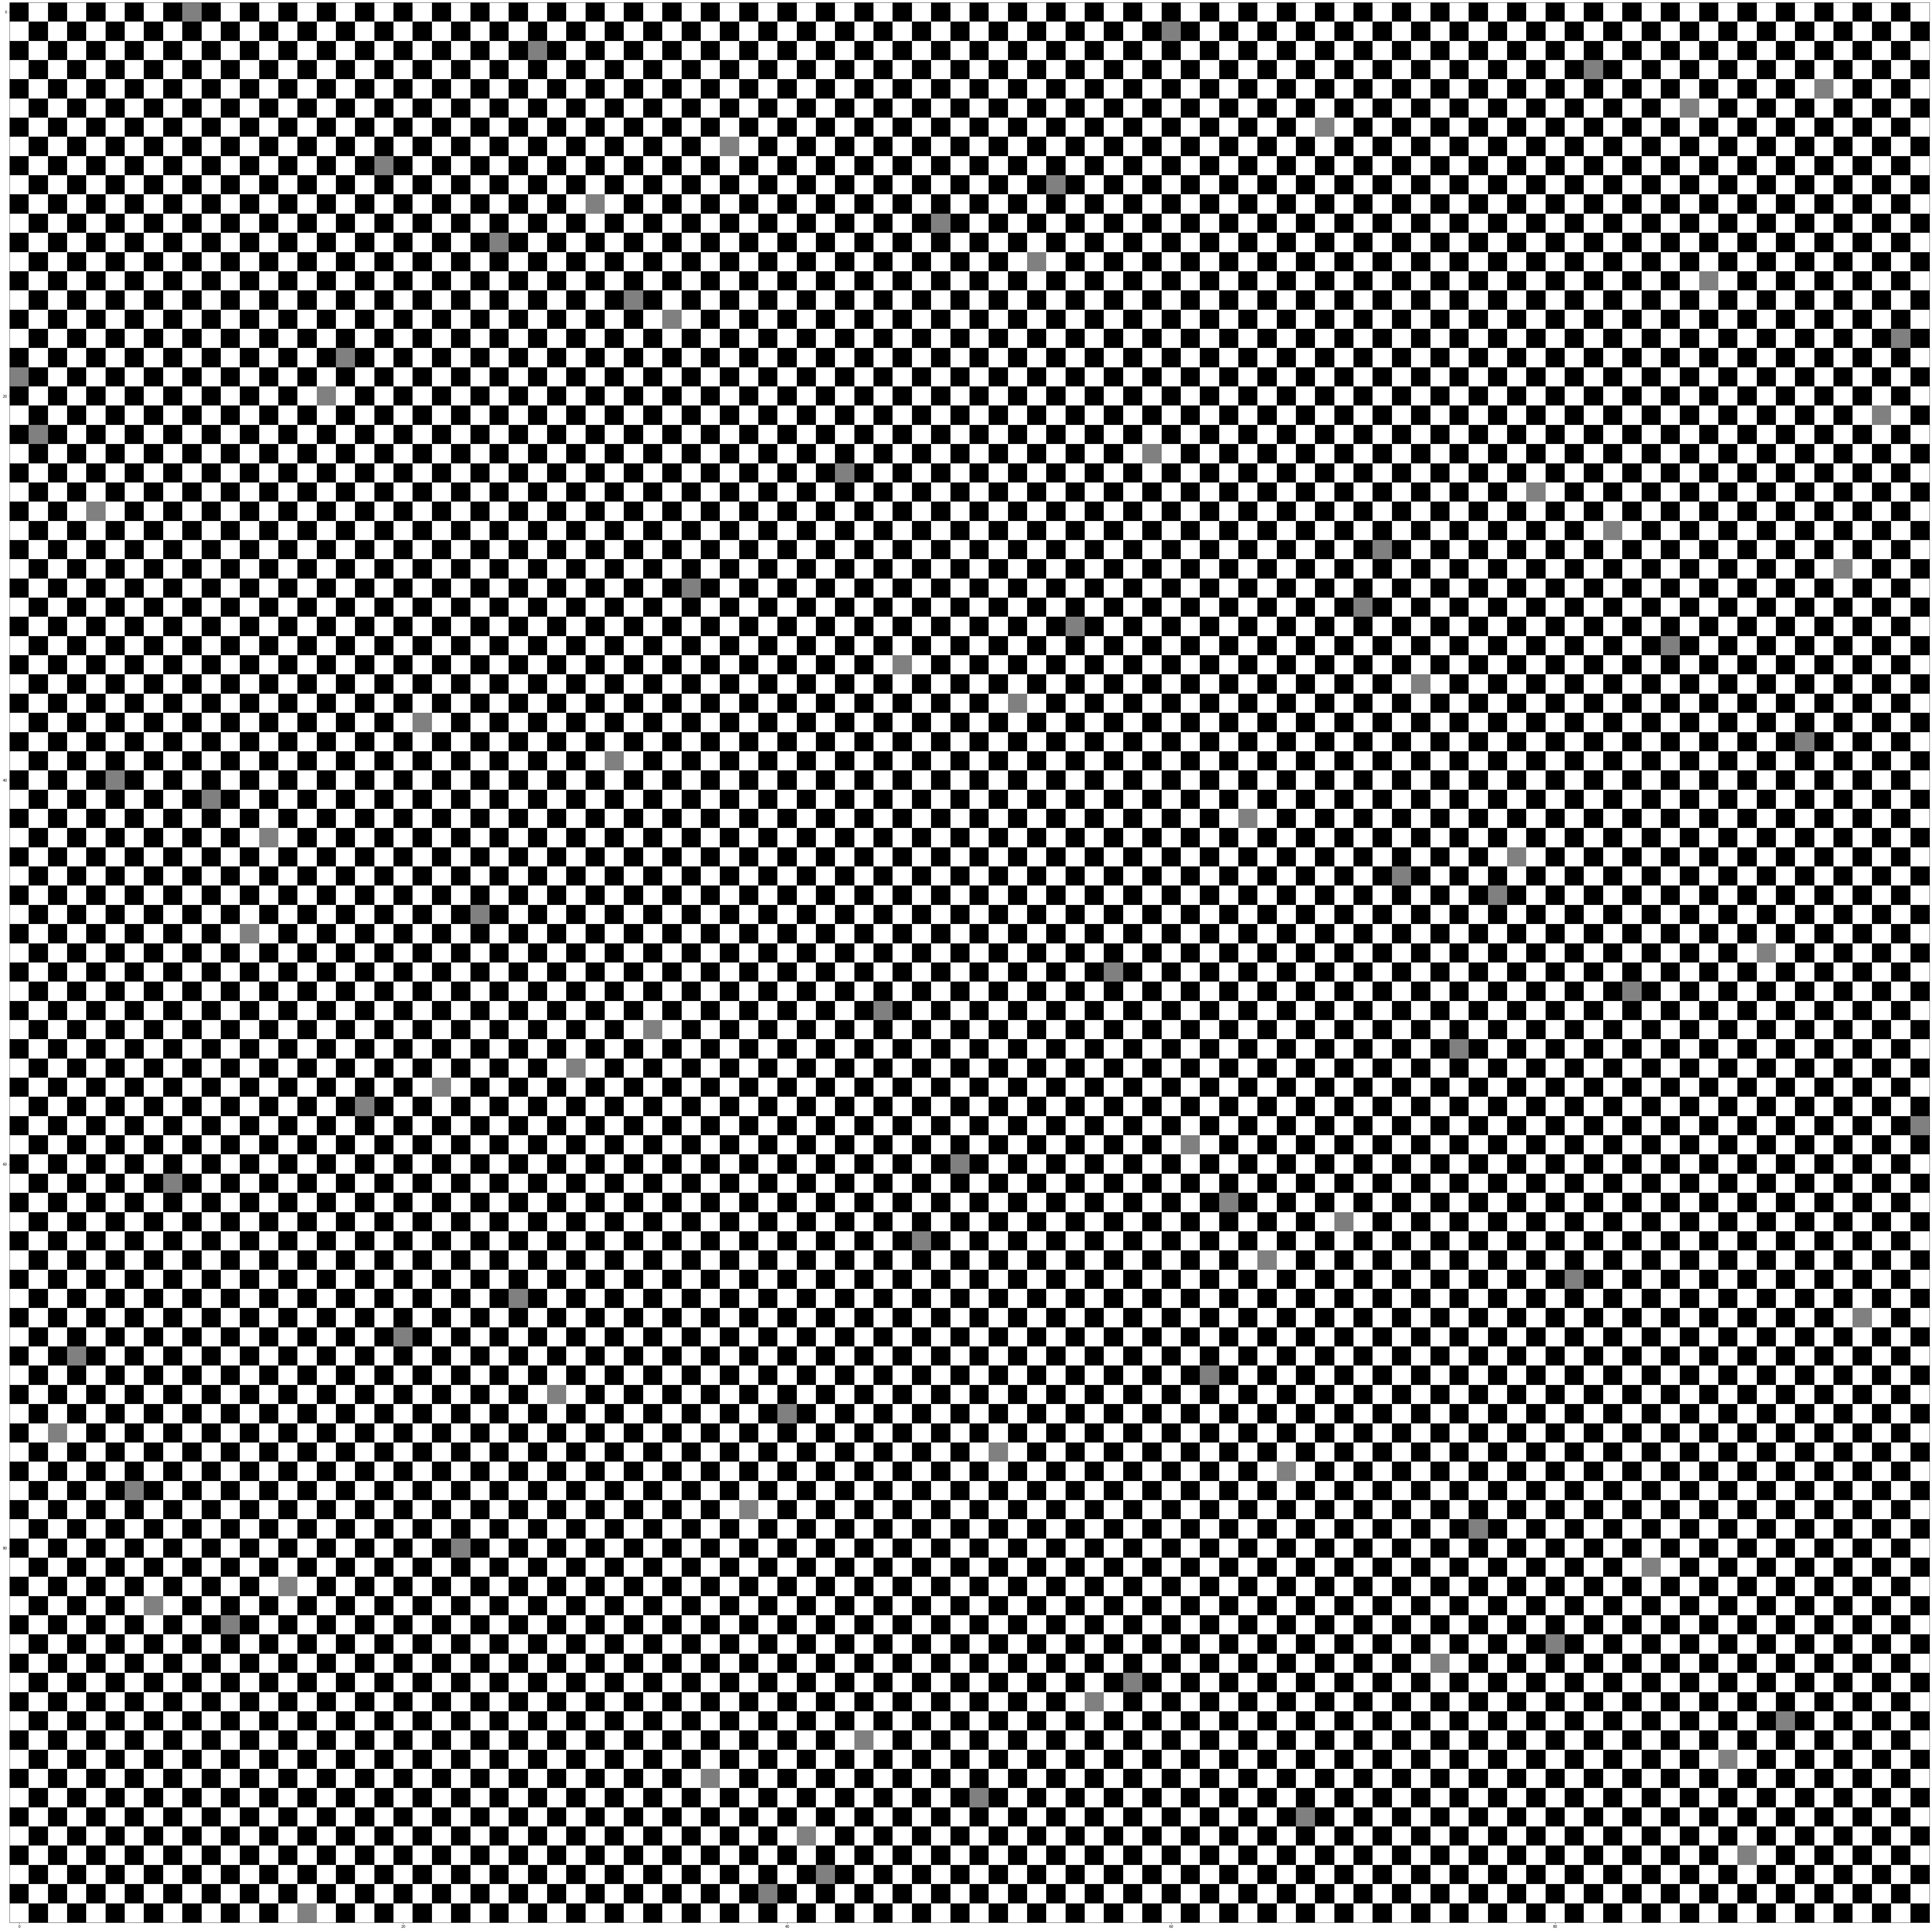

In [12]:
chess_i = []

size = 100

#The plot is drawn according to the output of the online terminal
#chrom = last_df['chromosomes'].values[0] 
chrom =  [9, 60, 27, 82, 94, 87, 68, 37, 19, 54, 30, 48, 25, 53, 88, 32, 34, 98, 17, 0, 16, 97, 1, 59, 43, 79, 4, 83, 71, 95, 35, 70, 55, 86, 46, 73, 52, 21, 93, 31, 5, 10, 64, 13, 78, 72, 77, 24, 12, 91, 57, 84, 45, 33, 75, 29, 22, 18, 99, 61, 49, 8, 63, 69, 47, 65, 81, 26, 96, 20, 3, 62, 28, 40, 2, 51, 66, 6, 38, 76, 23, 85, 14, 7, 11, 80, 74, 58, 56, 92, 44, 89, 36, 50, 67, 41, 90, 42, 39, 15]

for i in range(size):
    
    chess_j = []
    
    for j in range(size):
        
        if i % 2 != 0:
        
            if j % 2 != 0:

                if chrom[i] == j: 

                    chess_j.append(1)

                else:

                    chess_j.append(0)

            else:

                if chrom[i] == j:

                    #print("chrom[i]:") 
                    #print(chrom[i] )

                    chess_j.append(1)

                else:

                    chess_j.append(2)
                
        else:
        
            if j % 2 == 0:

                if chrom[i] == j: 

                    chess_j.append(1)

                else:

                    chess_j.append(0)

            else:

                if chrom[i] == j:

                    #print("chrom[i]:") 
                    #print(chrom[i] )

                    chess_j.append(1)

                else:

                    chess_j.append(2)
                
            
        
    chess_i.append(chess_j[:])
        
#print(chess_i)
        
plt.figure(figsize = (size, size))
plt.imshow(chess_i, cmap='gray')
        